In [8]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [19]:
for images, labels in trainloader:
    print(images, labels)
    
    print(len(images))
    break

tensor([[[[ 0.7020,  0.6863,  0.6000,  ...,  0.5373,  0.5608,  0.5451],
          [ 0.6157,  0.6471,  0.5765,  ...,  0.5608,  0.5529,  0.5608],
          [ 0.5529,  0.5608,  0.6000,  ...,  0.5451,  0.5294,  0.5294],
          ...,
          [ 0.2706,  0.3490,  0.4431,  ..., -0.7961, -0.7725, -0.7569],
          [ 0.3804,  0.2627,  0.2941,  ..., -0.8039, -0.7725, -0.7412],
          [ 0.4431,  0.2863,  0.1843,  ..., -0.8118, -0.7725, -0.7569]],

         [[ 0.4745,  0.3882,  0.2784,  ...,  0.2549,  0.2784,  0.2706],
          [ 0.2706,  0.2784,  0.2471,  ...,  0.2863,  0.3020,  0.3098],
          [ 0.2314,  0.2471,  0.2549,  ...,  0.2706,  0.2627,  0.2627],
          ...,
          [-0.0353, -0.0431, -0.0353,  ..., -0.8353, -0.8039, -0.7961],
          [ 0.0039, -0.0588, -0.0667,  ..., -0.8431, -0.7961, -0.7647],
          [ 0.0118, -0.0667, -0.1137,  ..., -0.8353, -0.7961, -0.7725]],

         [[ 0.4118,  0.3020,  0.2000,  ...,  0.3569,  0.4039,  0.4039],
          [ 0.1922,  0.2078,  

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

horse  frog  ship   dog


In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*25, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [16]:
for i, data in enumerate(trainloader, 0):
    print(i)
    print(data)
    
    break

0
[tensor([[[[-0.7647, -0.6000, -0.5922,  ..., -0.7333, -0.6627, -0.5137],
          [-0.7804, -0.6471, -0.6392,  ..., -0.5608, -0.3412, -0.1451],
          [-0.8039, -0.7255, -0.7020,  ..., -0.4980, -0.0824,  0.1216],
          ...,
          [-0.3569, -0.4196, -0.4588,  ..., -0.3804, -0.3569, -0.3725],
          [-0.2000, -0.2863, -0.3569,  ..., -0.3804, -0.3647, -0.3725],
          [-0.1765, -0.1922, -0.2627,  ..., -0.3647, -0.3412, -0.3961]],

         [[-0.6863, -0.4588, -0.4275,  ..., -0.6863, -0.5765, -0.4667],
          [-0.7020, -0.4980, -0.4667,  ..., -0.5373, -0.3020, -0.0824],
          [-0.7333, -0.6157, -0.5608,  ..., -0.4980, -0.0588,  0.1686],
          ...,
          [-0.4824, -0.5294, -0.5529,  ..., -0.4118, -0.3882, -0.4039],
          [-0.4196, -0.4588, -0.4745,  ..., -0.4039, -0.3961, -0.4039],
          [-0.4039, -0.4118, -0.4118,  ..., -0.3961, -0.3725, -0.4275]],

         [[-0.8745, -0.9216, -0.9059,  ..., -0.7961, -0.8118, -0.6078],
          [-0.9059, -0.9137

In [17]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        #print(inputs)
        
        #print(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.257
[1,  4000] loss: 1.242
[1,  6000] loss: 1.219
[1,  8000] loss: 1.228
[1, 10000] loss: 1.224
[1, 12000] loss: 1.213
[2,  2000] loss: 1.140
[2,  4000] loss: 1.136
[2,  6000] loss: 1.144
[2,  8000] loss: 1.124
[2, 10000] loss: 1.140
[2, 12000] loss: 1.136
Finished Training


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 55 %


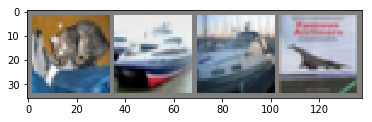

In [173]:


### Here, we test the overall accuracy of our model. ###

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')


trainset

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*25, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



### Here, we test the overall accuracy of our model. ###

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))